# Preprocessing & Modeling - Regression Modeling

Objective: West Nile virus (WNV) is mosquito-borne disease. It is most commonly spread to people by the bite of an infected mosquito. As data scientists hired by CDC, We want to understand the factors driving the spread of WNV and suggest a cost-efficient method to handle with it.


#### Import Libraries

We import the necessary libraries used in analysis.

In [1]:
# import libraries

# maths
import numpy as np
import pandas as pd

# visual
#from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style="whitegrid")

# modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Others
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

#### Import Data

In [2]:
#import original data
train_ori = pd.read_csv('./clean_data/train_clean_final.csv')

In [3]:
train_ori.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1


In [4]:
# import clean data

train = pd.read_csv('./clean_data/train_clean_final.csv')
test = pd.read_csv('./clean_data/test_clean.csv')
weather = pd.read_csv('./clean_data/weather_clean.csv')

In [5]:
print('Size of train dataset: {}'.format(train.shape))
print('Size of test dataset: {}'.format(test.shape))
print('Size of weather dataset: {}'.format(weather.shape))

Size of train dataset: (8475, 13)
Size of test dataset: (116293, 11)
Size of weather dataset: (2944, 21)


In [6]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1


---

# EDA

Creating a seprated set of Detaframe for eda purposes (Additionally features that were created for eda purposes only will not be used in the model)

In [7]:
weather_eda = pd.read_csv('./clean_data/weather_clean.csv')
spray_eda = pd.read_csv('./clean_data/spray_clean.csv')
train_eda = pd.read_csv('./clean_data/train_clean_final.csv')
test_eda = pd.read_csv('./clean_data/test_clean.csv')
weather_eda['Date'] = pd.to_datetime(weather_eda['Date'])
spray_eda['Date'] = pd.to_datetime(spray_eda['Date'])
train_eda['Date'] = pd.to_datetime(train_eda['Date'])
test_eda['Date'] = pd.to_datetime(test_eda['Date'])

In [8]:
train_eda = pd.merge(train_eda, weather_eda, how = 'left',left_on=['Date','Station'], right_on = ['Date','Station'])
display(train_eda.head(2))
display(train_eda.tail(2))

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
8473,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,...,1742,BR,0.0,0.0,29.34,30.04,3.8,8,4.2,819
8474,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8,...,1742,,0.0,0.0,29.34,30.04,4.1,9,4.6,819


In [9]:
test_eda = pd.merge(test_eda, weather_eda, how = 'left',left_on=['Date','Station'], right_on = ['Date','Station'])
display(test_eda.head(2))
display(test_eda.tail(2))

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
116291,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.63359,8,...,1732,TSRA RA BR,0.0,0.0,29.34,29.78,7.2,17,7.9,803
116292,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX ERRATICUS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.63359,8,...,1732,TSRA RA BR,0.0,0.0,29.34,29.78,7.2,17,7.9,803


In [10]:
spray_eda['year'] = spray_eda.Date.dt.year
spray_eda['month'] = spray_eda.Date.dt.month
train_eda['year'] = train_eda.Date.dt.year
train_eda['month'] = train_eda.Date.dt.month

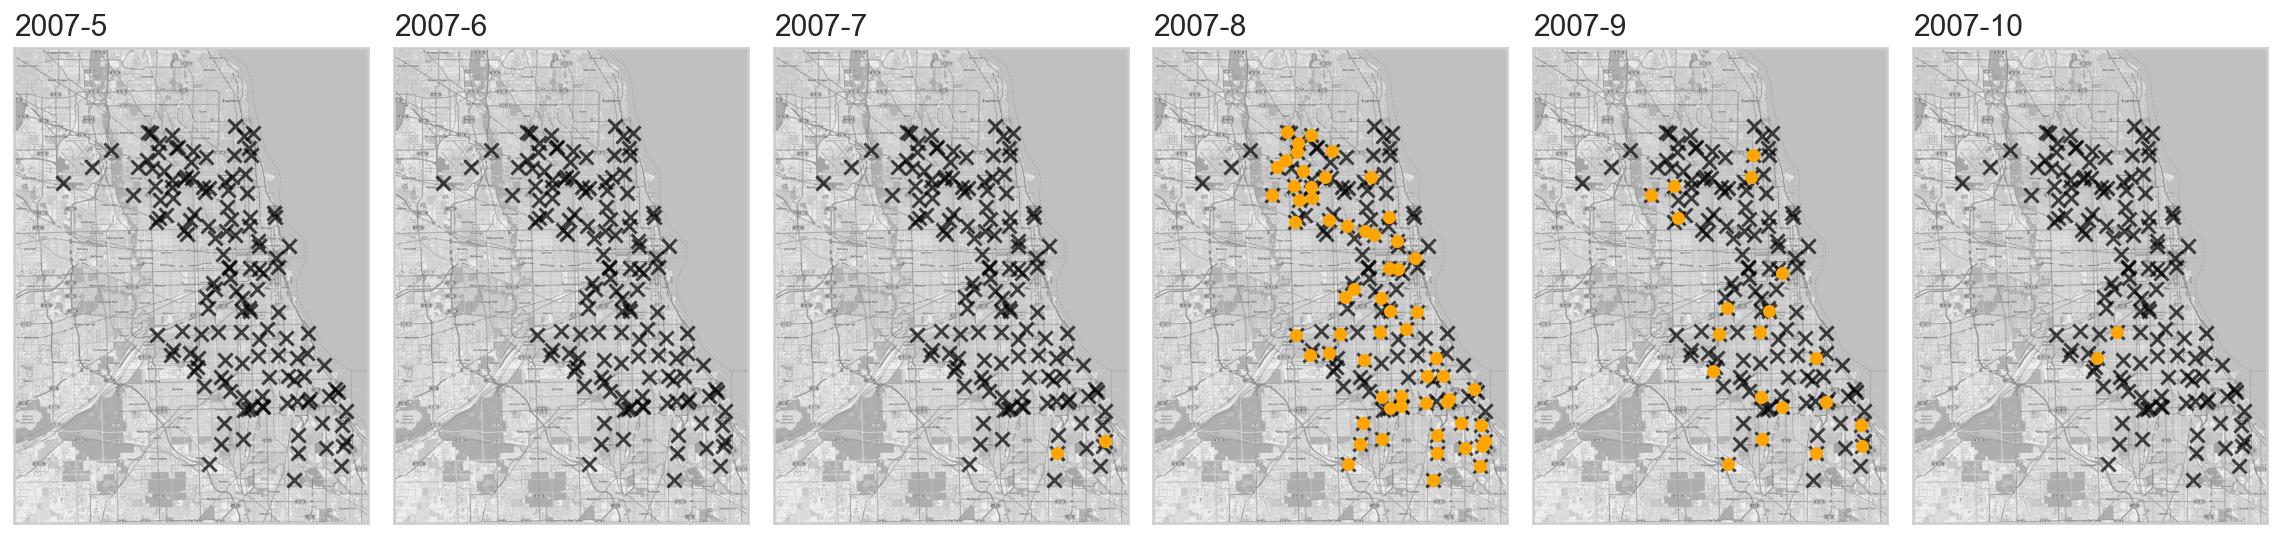

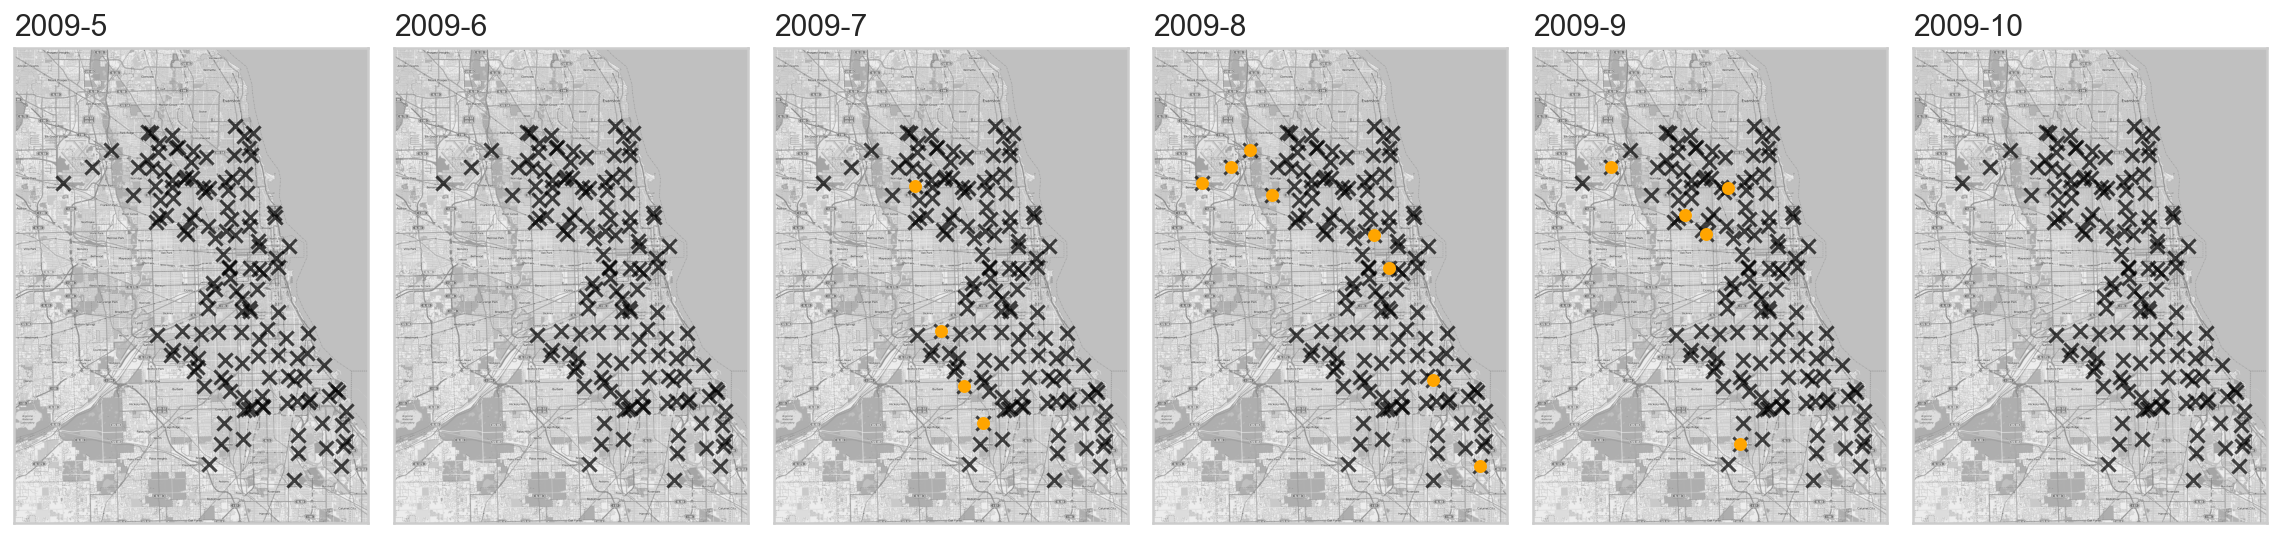

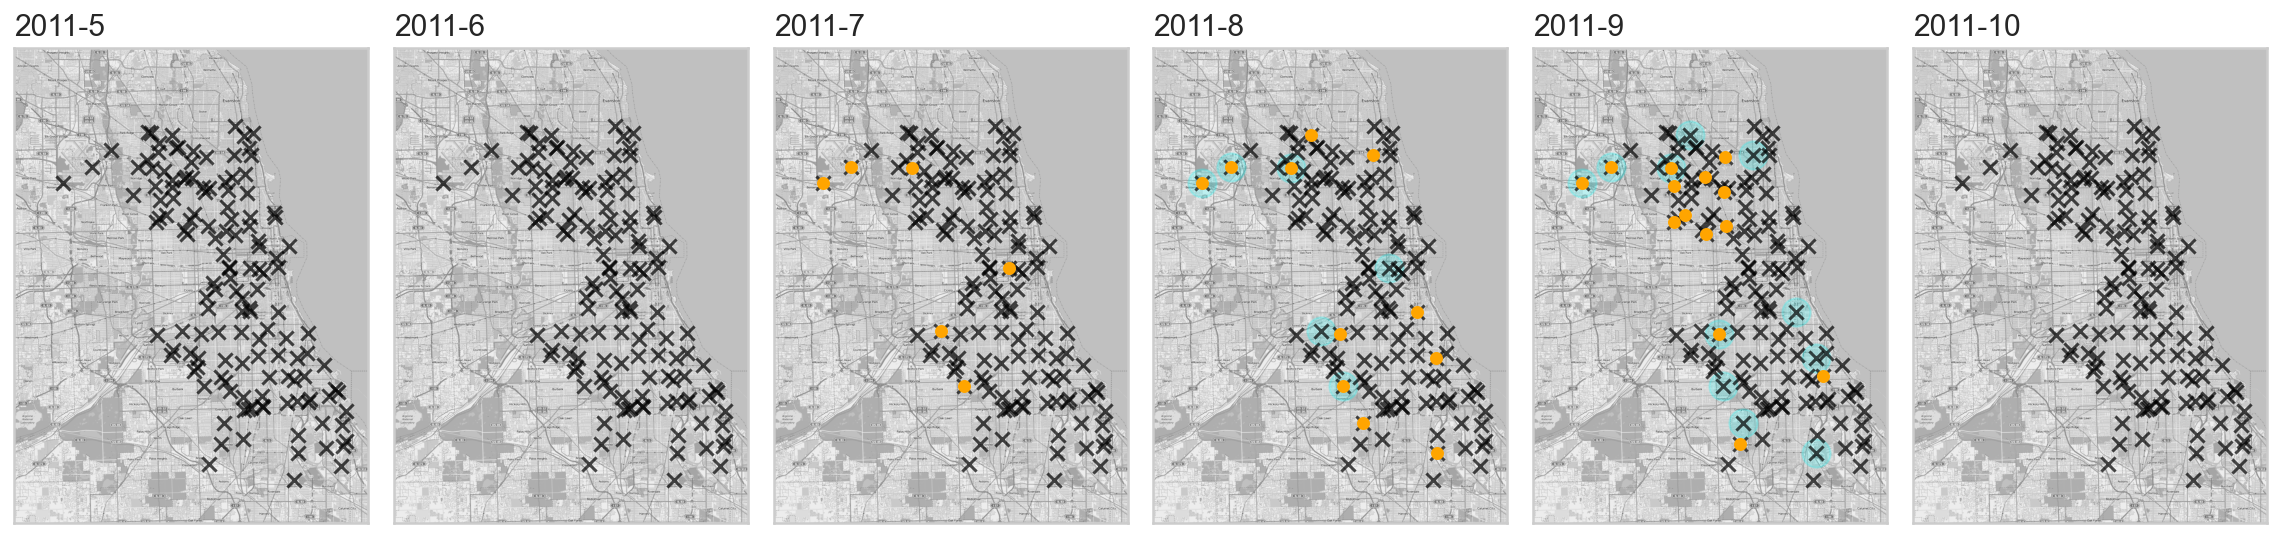

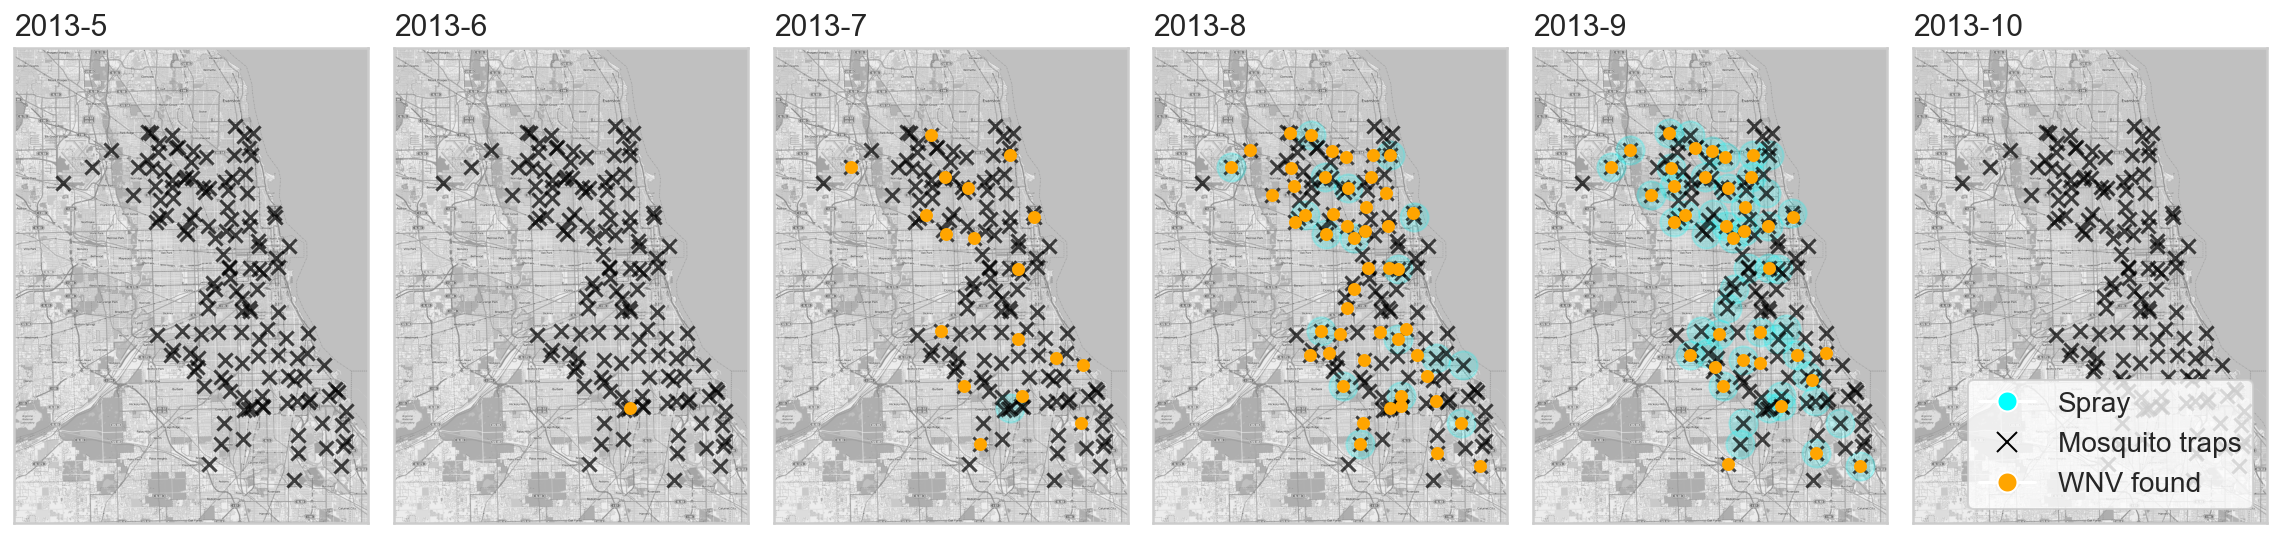

In [11]:
# set up basemap
mapdata = np.loadtxt("./clean_data/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
# create plot for each month and year 
for year in train_eda.year.unique():
    fig, ax = plt.subplots(ncols = 6, figsize = (16,5))
    for i, month in enumerate([5,6,7,8,9,10]):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        # plot spray locations for year and month
        if year in spray_eda.year.unique() and month in spray_eda.month.unique():
            sprayed = spray_eda[(spray_eda.year == year) & (spray_eda.month == month)][['Longitude', 'Latitude']].drop_duplicates().values
            ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'cyan', s = 200, alpha = 0.2)
        # plot trap locations
        locations = train_eda[['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(locations[:,0], locations[:,1], marker='x', c = 'black', s=50, alpha = 0.7)
        # plot wnv locations for year and month
        wnv = train_eda[(train_eda.year == year) & (train_eda.month == month) & (train_eda.WnvPresent == 1)]\
                [['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'orange', s = 30)
        # title and axes
        ax[i].set_title(f"{year}-{month}", fontsize = 15, ha = 'left', position = (0,1))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        plt.tight_layout()
#         plt.savefig(f'heatmap_{year}_{month}')
# custom legend
legend_elements=[Line2D([0],[0],marker='o', color='w',label='Spray', markerfacecolor='cyan', markersize=10),
                 Line2D([0],[0],marker='x', color='black', label='Mosquito traps',linestyle='', markersize=10),
                 Line2D([0],[0],marker='o', color='w',label='WNV found',markerfacecolor='orange', markersize=10)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=14)
plt.tight_layout()

From this visualization, we can identify that the Virus is most active from month 7-10. 

#### Summary of the timelines across the data sets
- 1) Weather: 2007-05-01 to 2014-10-31
- 2) Spray: 2011-08-29 to 2013-09-05
- 3) Train: 2007-05-29 to 2013-09-26
- 4) Test: 2008-06-11 to 2014-10-02

Check effects of weather on virus by considering only the period 2007-05-29 to 2011-08-29 (this is the period before spraying started). This will give us the most important weather features for the model.

Spraying took place on 10 seperate days in 2011 & 2013. No records of spraying on the days in Test data. Thus, we can be certain that our predictions for Test data will not consider spraying. i.e. 100% based on weather data only.

Weather data is available for all Test data. 

---

### Combining Weather Dataset with Test/Train Datasets

In [12]:
#Drops nummosquitos and wnvpresent columns from train not in test
train = train.drop(['NumMosquitos', 'WnvPresent'], axis=1)

#Combines train and test datasets
combined_train_test = pd.concat([test,train])

print('Size of train/test dataset: {}'.format(combined_train_test.shape))

Size of train/test dataset: (124768, 11)


In [13]:
combined_train_test.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1


In [14]:
weather.head(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
0,1,2007-05-01,83,50,67,14,51,56.0,0,2,...,1849,,0.0,0.0,29.34,29.82,1.7,27,9.2,841


We split the data from each station and use only the data from Station 1 here, considering that there were many null values in Station 2 which we imputed from Station 1 data when cleaning the data. We then, merge the Station 1 weather data with the train/test dataset to add information on weather conditions as measured at Station 1 on the dates of virus test.

In [15]:
#Combines weather data with train and test dataset
all_dataset = combined_train_test.merge(weather, how='left', on=['Station', 'Date'])

print('Size of train/test dataset with weather data: {}'.format(all_dataset.shape))

Size of train/test dataset with weather data: (124768, 30)


In [16]:
#Prints train/test dataset with weather information
all_dataset.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1926,,0.0,0.0,29.34,29.99,8.9,18,10.0,910


In [17]:
all_dataset['Block'].value_counts()

10    9247
11    8261
22    5002
40    3973
37    3371
      ... 
47     778
27     776
80     771
55     768
26     760
Name: Block, Length: 65, dtype: int64

In [18]:
#Converts categorical data into numeric
df_get_dum = pd.concat([all_dataset, pd.get_dummies(all_dataset[['Species', 'Street', 'Trap']],drop_first=True)], axis=1)
df_get_dum.drop(['Species', 'Street', 'Trap'], inplace =True, axis=1)

print('Size of train/test dataset with weather data(One Hot Encoded): {}'.format(df_get_dum.shape))

Size of train/test dataset with weather data(One Hot Encoded): (124768, 320)


In [19]:
df_get_dum.head()

,Date,Address,Block,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,...,0,0,0,0,0,0,0,0,0,0
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,...,0,0,0,0,0,0,0,0,0,0
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,...,0,0,0,0,0,0,0,0,0,0
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,...,0,0,0,0,0,0,0,0,0,0
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_get_dum.dtypes

Date                       object
Address                    object
Block                       int64
AddressNumberAndStreet     object
Latitude                  float64
                           ...   
Trap_T236                   uint8
Trap_T237                   uint8
Trap_T238                   uint8
Trap_T900                   uint8
Trap_T903                   uint8
Length: 320, dtype: object

In [21]:
df_get_dum['Date'] = pd.to_datetime(df_get_dum['Date'])

In [22]:
df_get_dum.dtypes

Date                      datetime64[ns]
Address                           object
Block                              int64
AddressNumberAndStreet            object
Latitude                         float64
                               ...      
Trap_T236                          uint8
Trap_T237                          uint8
Trap_T238                          uint8
Trap_T900                          uint8
Trap_T903                          uint8
Length: 320, dtype: object

We drop 'block' as the information is used to derive the latitude and longitude.

In [23]:
# drop 'block' column
df_get_dum.drop(['Block'], inplace =True, axis=1)
print('Size of train/test dataset with weather data(after dropping block): {}'.format(df_get_dum.shape))

Size of train/test dataset with weather data(after dropping block): (124768, 319)


We split the data back into seperate train and test datasets and only use train for training the model.

In [24]:
df_get_dum['data'] = df_get_dum["Date"].dt.year % 2
#even = test
#odd = train

In [25]:
df_get_dum["data"].value_counts()

0    116293
1      8475
Name: data, dtype: int64

In [26]:
df_get_dum.head(10)

,Date,Address,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,...,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,data
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
6,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
8,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA","6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0
9,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA","6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Splits out train dataset using year
train = df_get_dum[df_get_dum['data'] == 1]
train.reset_index(inplace=True, drop=True)
train.drop(columns = 'data', inplace = True)

#Re-attaching original nummosquitos and wnvpresent columns
wnv = pd.Series(train_ori['WnvPresent'])
train_with_wnv = pd.concat([train , wnv], axis=1)
train_with_wnv['NumMosquitos'] = train_ori['NumMosquitos']

print('Size of processed train data: {}'.format(train_with_wnv.shape))

Size of processed train data: (8475, 321)


In [28]:
#Splits out test dataset using year
test = df_get_dum.loc[df_get_dum['data'] ==0]
test.reset_index(inplace=True, drop=True)
test.drop(columns = 'data', inplace = True)

print('Size of processed test data: {}'.format(test.shape))

Size of processed test data: (116293, 319)


In [29]:
train_with_wnv.head(1)

,Date,Address,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent,NumMosquitos
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,88,60,74,...,0,0,0,0,0,0,0,0,0,1


In [30]:
test.head(1)

,Date,Address,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,0,0


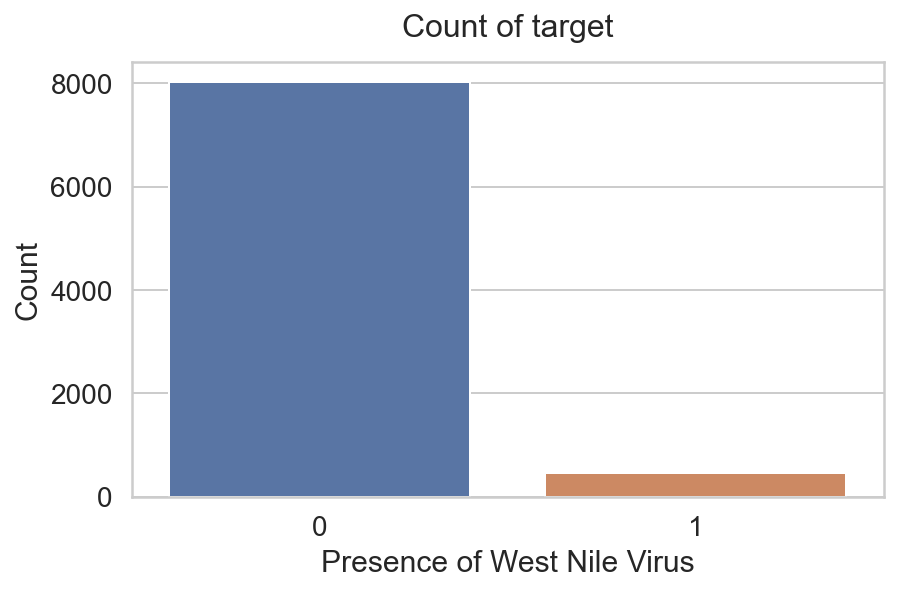

In [31]:
# The target is imbalanced, which will be taken care of before modelling is done.
sns.barplot(x=[0,1], y=train_eda.WnvPresent.value_counts())
plt.xlabel('Presence of West Nile Virus', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tick_params(labelsize=14)
plt.title('Count of target',fontsize=16, y=1.03)
plt.show()

We also note that the data is imbalanced. Out of the 8475 rows in our training dataset, only 457 (~5%) data points represent the virus present class while 8018 represent virus not present.

In [32]:
#Splits data by presence of wnv
majority_class = train_with_wnv[train_with_wnv['WnvPresent']==0]
minority_class = train_with_wnv[train_with_wnv['WnvPresent']==1]

#Resamples minority class with replacement
minority_upsampled = resample( minority_class, replace=True, n_samples=majority_class.shape[0], random_state=42)

#Combine new minority class dataset with original majority class dataset
train_resampled = pd.concat([minority_upsampled,majority_class])

#Checks class representation
train_resampled.WnvPresent.value_counts()

1    8018
0    8018
Name: WnvPresent, dtype: int64

In [33]:
#Shuffles dataset to inject randomness
df = shuffle(train_resampled, random_state=42)
df.reset_index(drop=True, inplace=True)

# Print resampled, reshuffled new dataset
df.head()

,Date,Address,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent,NumMosquitos
0,2007-07-11,"1000 West 95th Street, Chicago, IL 60643, USA","1000 W 95TH ST, Chicago, IL",41.721474,-87.648064,8,2,77,63,70,...,0,0,0,0,0,0,0,0,0,15
1,2013-09-06,"4500 North Campbell Avenue, Chicago, IL 60625,...","4500 N CAMPBELL AVE, Chicago, IL",41.963976,-87.691810,9,2,85,62,74,...,0,0,0,0,0,0,0,0,1,82
2,2007-08-24,"3600 North Pittsburgh Avenue, Chicago, IL 6063...","3600 N PITTSBURGH AVE, Chicago, IL",41.944869,-87.832763,8,1,80,69,75,...,0,0,0,0,0,0,0,0,1,9
3,2007-10-04,"7300 Cicero Avenue, Chicago, IL 60638, USA","7300 S CICERO AVE, Chicago, IL",41.759346,-87.745602,9,2,83,56,70,...,0,0,0,0,0,0,0,0,0,11
4,2011-06-24,"South Stony Island Avenue, Chicago, IL, USA","1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,2,68,60,64,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df.head()

,Date,Address,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent,NumMosquitos
0,2007-07-11,"1000 West 95th Street, Chicago, IL 60643, USA","1000 W 95TH ST, Chicago, IL",41.721474,-87.648064,8,2,77,63,70,...,0,0,0,0,0,0,0,0,0,15
1,2013-09-06,"4500 North Campbell Avenue, Chicago, IL 60625,...","4500 N CAMPBELL AVE, Chicago, IL",41.963976,-87.691810,9,2,85,62,74,...,0,0,0,0,0,0,0,0,1,82
2,2007-08-24,"3600 North Pittsburgh Avenue, Chicago, IL 6063...","3600 N PITTSBURGH AVE, Chicago, IL",41.944869,-87.832763,8,1,80,69,75,...,0,0,0,0,0,0,0,0,1,9
3,2007-10-04,"7300 Cicero Avenue, Chicago, IL 60638, USA","7300 S CICERO AVE, Chicago, IL",41.759346,-87.745602,9,2,83,56,70,...,0,0,0,0,0,0,0,0,0,11
4,2011-06-24,"South Stony Island Avenue, Chicago, IL, USA","1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,2,68,60,64,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df['Month'] = df.Date.dt.month
test['Month'] = test.Date.dt.month

### From this section:
1. Train + Test were conbined with features from the weather dataset
2. Dummies were created
3. Train and Test were split
4. Train dataset recieve resamplying to counter the imbalanced data to create 'df'
5. 'df' DataFrame was created to be used to create models

---

### Feature Engineering (NumMosquitos)

#### Predict number of mosquitos

We use all the features in the dataset to fit regression models and identify nummosquitos to be our target.

In [36]:
X = df[[f for f in df._get_numeric_data().columns if f !='WnvPresent' and f !='NumMosquitos']]
y = df.NumMosquitos

# data is split randomly into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X.dtypes

Latitude           float64
Longitude          float64
AddressAccuracy      int64
Station              int64
Tmax                 int64
                    ...   
Trap_T237            uint8
Trap_T238            uint8
Trap_T900            uint8
Trap_T903            uint8
Month                int64
Length: 316, dtype: object

We fit the model on the following regressions and test its performance using R2 score:
- Linear Regression,
- Ridge,
- Lasso,
- Elastic Net,
- Random Forest Regressor

In [38]:
estimators = {
    'linear regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(),
    'random forest': RandomForestRegressor(random_state=42)
}.items()

for k,v in estimators:
    pipe = Pipeline([
        ('sc', StandardScaler()),
        (k,v)])
    model = pipe.fit(X_train,y_train)
    print('{} score: {}\nCross Validation Mean: {}\nCross Validation Std Dev: {}\n\n'.format(k, model.score(X_train,y_train), round(cross_val_score(model,X,y,cv=3).mean(),5), round(cross_val_score(model,X,y,cv=3).std(),5)))

linear regression score: 0.3584617830300416
Cross Validation Mean: -1.425592516628628e+21
Cross Validation Std Dev: 2.016092271433798e+21


ridge score: 0.36073819681355856
Cross Validation Mean: 0.34512
Cross Validation Std Dev: 0.02896


lasso score: 0.35499172432844717
Cross Validation Mean: 0.34161
Cross Validation Std Dev: 0.02911


elasticnet score: 0.33955021187532575
Cross Validation Mean: 0.33006
Cross Validation Std Dev: 0.0141


random forest score: 0.990100755254614
Cross Validation Mean: 0.92198
Cross Validation Std Dev: 0.01681




Using the default parameters, the R2 scores for all models are very low except for random forest regressor. As random forest regressor is a bagging technique, the aggregation of regression of random features will produce the highest score. As such, we chose to focus on random forest regressor to tune the hyperparameters and take a look at the features that are more important.

In [39]:
# Random Forest Regressor has the highest score in predicting the number of mosquitos. 
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('rfr', RandomForestRegressor(n_estimators=20, random_state=42))
         ])

params = {'rfr__n_estimators': [10, 30, 50, 100]}

gridsearch = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        verbose=1,
        n_jobs=3,
    )

gridsearch.fit(X_train, y_train)
    
model = gridsearch.best_estimator_
score = model.score(X_test, y_test)
best_params = gridsearch.best_params_

# print results
print("Best parameters:", best_params)
print("Best R2 score:", gridsearch.best_score_)
print("Test R2 score:", score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'rfr__n_estimators': 50}
Best R2 score: 0.9216661929214643
Test R2 score: 0.8497024479850241


In [40]:
regressor = model.named_steps['rfr']

fi = pd.DataFrame({
    'features': X.columns,
    'importances': regressor.feature_importances_})

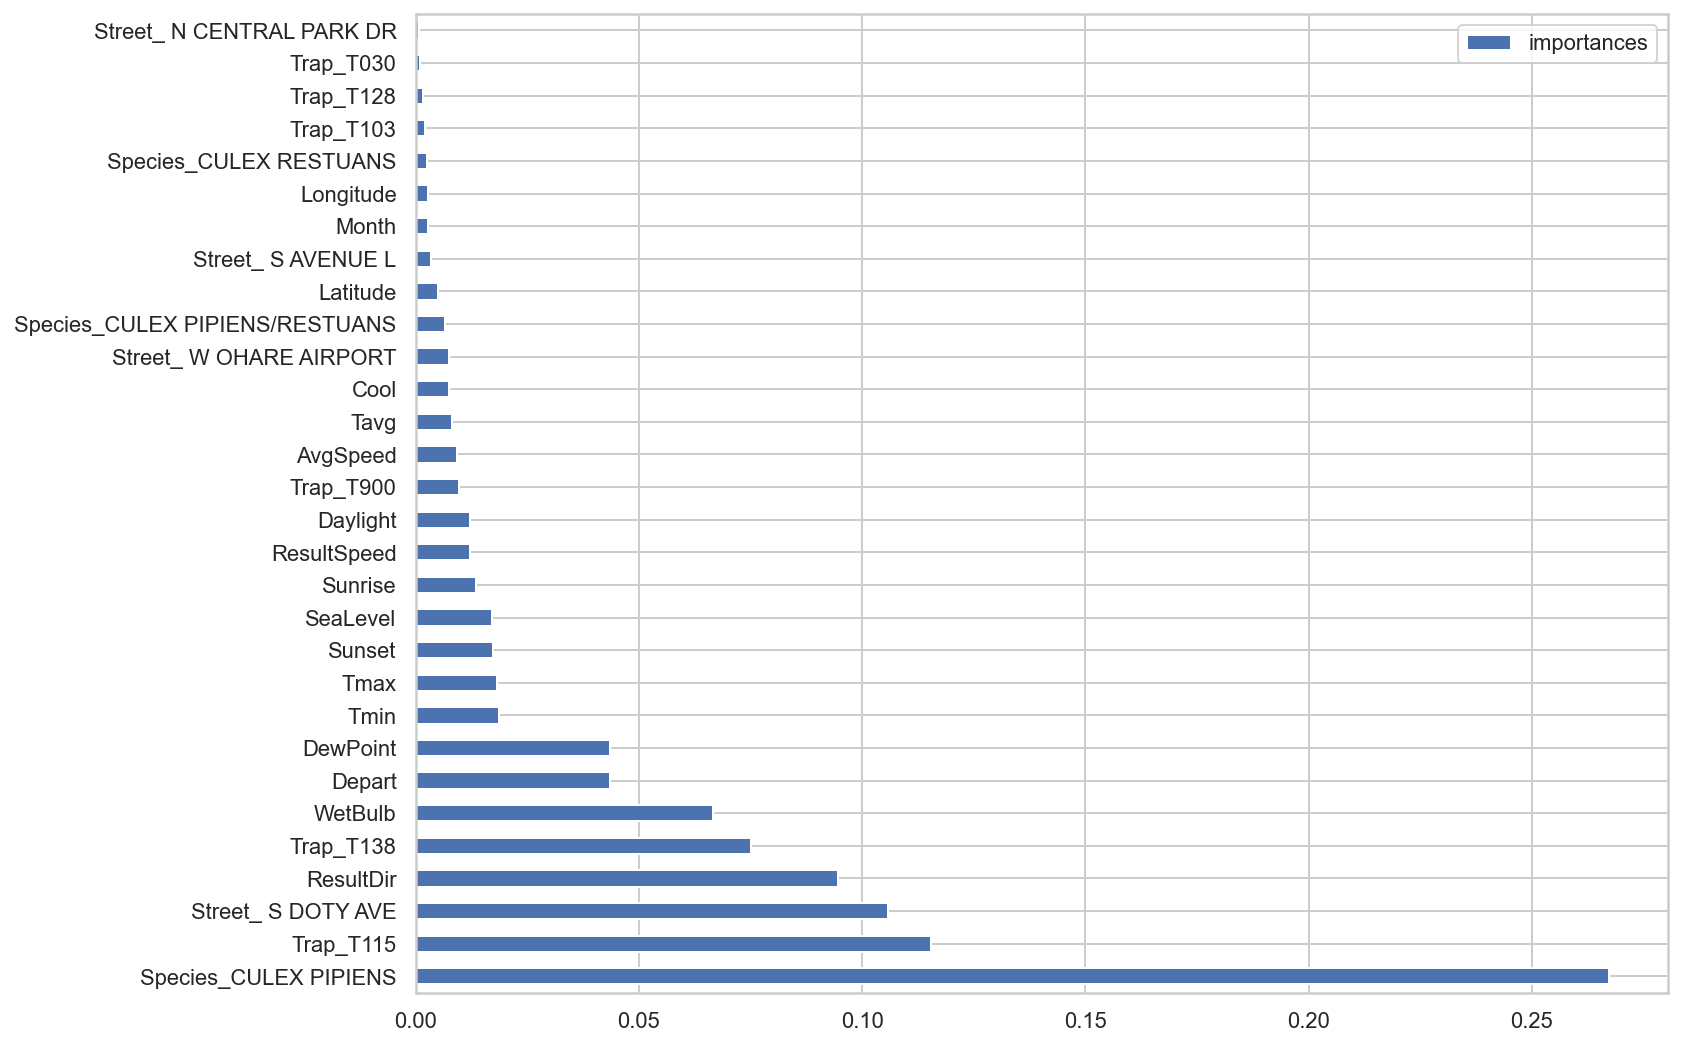

In [41]:
fig = fi.sort_values(by='importances', ascending=False).iloc[:30]
fig.plot(kind='barh', figsize=(10,9))
plt.yticks(range(len(fig)),fig['features'])
plt.show()

From the plot above, the feature importance becomes very small after the 31st feature. Hence, we will take the top 31 features for Random forest regressor model.

In [42]:
features1 = list(fig.head(31).features)
features1

['Species_CULEX PIPIENS',
 'Trap_T115',
 'Street_ S DOTY AVE',
 'ResultDir',
 'Trap_T138',
 'WetBulb',
 'Depart',
 'DewPoint',
 'Tmin',
 'Tmax',
 'Sunset',
 'SeaLevel',
 'Sunrise',
 'ResultSpeed',
 'Daylight',
 'Trap_T900',
 'AvgSpeed',
 'Tavg',
 'Cool',
 'Street_ W OHARE AIRPORT',
 'Species_CULEX PIPIENS/RESTUANS',
 'Latitude',
 'Street_ S AVENUE L',
 'Month',
 'Longitude',
 'Species_CULEX RESTUANS',
 'Trap_T103',
 'Trap_T128',
 'Trap_T030',
 'Street_ N CENTRAL PARK DR']

In [43]:
X1 = df[features1]
X_train1 = X_train[features1]
X_test1 = X_test[features1]
 
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('rfr', RandomForestRegressor(n_estimators=30, random_state=42))
         ])

model = pipe.fit(X_train1, y_train)
score = model.score(X_test1, y_test)

# print results
print("R2 score:", score)
print("Cross validation scores mean:", round(cross_val_score(model,X1,y,cv=3).mean(),5))
print("Cross validation scores std dev:", round(cross_val_score(model,X1,y,cv=3).std(),5))

R2 score: 0.8527913127290485
Cross validation scores mean: 0.92418
Cross validation scores std dev: 0.01924


The mean of the cross validation scores is close to the R2 score and the standard deviation is low, indicating that the model can be generalised to unseen data.

### Use the Regression model
1. NumMosquitos will be predicted my our Model for the test set

In [44]:
# selecting the features selected for kaggle test set
X_kaggle = test[features1]
X_kaggle.head()

,Species_CULEX PIPIENS,Trap_T115,Street_ S DOTY AVE,ResultDir,Trap_T138,WetBulb,Depart,DewPoint,Tmin,Tmax,...,Species_CULEX PIPIENS/RESTUANS,Latitude,Street_ S AVENUE L,Month,Longitude,Species_CULEX RESTUANS,Trap_T103,Trap_T128,Trap_T030,Street_ N CENTRAL PARK DR
0,0,0,0,18,0,64.0,7,56,61,86,...,1,41.95469,0,6,-87.800991,0,0,0,0,0
1,0,0,0,18,0,64.0,7,56,61,86,...,0,41.95469,0,6,-87.800991,1,0,0,0,0
2,1,0,0,18,0,64.0,7,56,61,86,...,0,41.95469,0,6,-87.800991,0,0,0,0,0
3,0,0,0,18,0,64.0,7,56,61,86,...,0,41.95469,0,6,-87.800991,0,0,0,0,0
4,0,0,0,18,0,64.0,7,56,61,86,...,0,41.95469,0,6,-87.800991,0,0,0,0,0


In [45]:
# predicting number of mosquitos from kaggle test set
test['NumMosquitos'] = model.predict(X_kaggle)
test['NumMosquitos'] = test['NumMosquitos'].map(lambda x:int(x))
test.head()

,Date,Address,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,Month,NumMosquitos
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,6,27
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,6,18
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,6,17
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,6,18
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,86,61,74,...,0,0,0,0,0,0,0,0,6,18


## Location/Date Clustering (Feature Engineering)
1. The purpose of this feature is to group locations near each other, during the same/close month together

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
X = df[['Month','Longitude','Latitude']]

In [48]:
X_2 = test[['Month', 'Longitude', 'Latitude']]

In [49]:
dbscan = DBSCAN()
dbscan.fit(X);

In [50]:
temp = dbscan.fit_predict(X)

In [51]:
test_temp = dbscan.fit_predict(X_2)

In [52]:
len(temp)

16036

In [53]:
df['Cluster'] = temp
test['Cluster'] = test_temp

---

## Creating Models to Predict Presence of West Nile Virus

We use all the features in the dataset to for classification and identify wnvpresent to be our target.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [55]:
X = df[[f for f in df._get_numeric_data().columns if f !='WnvPresent']]
y = df.WnvPresent

# data is split randomly into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [56]:
y_train.value_counts()

1    5372
0    5372
Name: WnvPresent, dtype: int64

In [57]:
y_test.value_counts()

1    2646
0    2646
Name: WnvPresent, dtype: int64

We train a model using Random Forest Classifer and tune the hyperparameters with GridSearch.

In [58]:
estimator_dict = {
   'lr': LogisticRegression(),
   'dt': DecisionTreeClassifier(),
   'rf' : RandomForestClassifier(n_estimators=100),
   'xgc' : xgb.XGBClassifier()
}

In [59]:
# Initialize functions for pipeline
def prepare_pipeline(estimator):
    pipe_list = (estimator,estimator_dict[estimator])
    return Pipeline([pipe_list])

# Initialize functions for parameters
def prepare_params(estimator):
    if estimator == 'lr':
        return {'lr__penalty' : ['l1', 'l2'],
                'lr__solver' : ['liblinear'],
                'lr__C' : np.logspace(-5, 0, 5),
                'lr__class_weight' : ['balanced']
                },
    elif estimator == 'dt':
        return {'dt__max_depth' : [3, 5],
                'dt__min_samples_split' : [5, 10],
                'dt__min_samples_leaf' : [2, 3]
                }  
    elif estimator == 'rf':
        return {
                'rf__n_estimators': [100, 150, 200],
                'rf__max_depth': [3, 4, 5],
                'rf__min_samples_leaf' : [1,2,3]
                }

    elif estimator == 'xgc':
        return {
                'xgc__eval_metric' : ['auc'],
                'xgc__subsample' : [0.5], 
                'xgc__colsample_bytree' : [0.5], 
                'xgc__learning_rate' : [0.1],
                'xgc__max_depth' : [3], 
                'xgc__scale_pos_weight': [19], # ratio of neg instances/pos instances
                'xgc__n_estimators' : [500],
                'xgc__reg_alpha' : [0, 1, 1.5],
                'xgc__reg_lambda' : [1, 2, 5],
                'xgc__gamma' : [0.01, 0.1, 3],
                }


In [60]:
def model_selection(estimator):
    parameters = []
    roc_auc = []

    gridsearch = GridSearchCV(
        estimator=prepare_pipeline(estimator),
        param_grid=prepare_params(estimator),
        verbose=1,
        cv= 3,
        n_jobs=-1,
        return_train_score= True,
        scoring = 'roc_auc'
    )

    gridsearch.fit(X_train, y_train)

    model = gridsearch.best_estimator_
    cv_score = gridsearch.cv_results_
    best_params = gridsearch.best_params_

    # predict y
    y_pred = pd.DataFrame(model.predict_proba(X_test), columns=['0','1'])

    # print results
    print("Best parameters:", best_params)
    print("Best score:", gridsearch.best_score_)
    print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))
    pd.set_option('display.max_rows', 750)
    display(pd.DataFrame(cv_score, columns = cv_score.keys()), )


    # append info to list
    parameters.append(best_params)
    roc_auc.append(roc_auc_score(y_test,y_pred['1']))
    print(" ")

In [61]:
model_selection('lr')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best score: 0.888621991351338
AUC/ROC test: 0.8900349591419671


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__class_weight,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.088610,0.002184,0.011536,0.003349,1e-05,balanced,l1,liblinear,"{'lr__C': 1e-05, 'lr__class_weight': 'balanced...",0.827416,0.834036,0.825887,0.829113,0.003537,8,0.833291,0.824374,0.828399,0.828688,0.003646
1,0.094178,0.013346,0.012412,0.002805,1e-05,balanced,l2,liblinear,"{'lr__C': 1e-05, 'lr__class_weight': 'balanced...",0.821729,0.827421,0.800310,0.816487,0.011672,9,0.813758,0.819919,0.817264,0.816980,0.002523
2,0.215731,0.030697,0.012392,0.004527,0.000177828,balanced,l1,liblinear,"{'lr__C': 0.00017782794100389227, 'lr__class_w...",0.798209,0.807525,0.776114,0.793949,0.013173,10,0.792015,0.798338,0.792953,0.794435,0.002786
3,0.106200,0.002918,0.008363,0.002210,0.000177828,balanced,l2,liblinear,"{'lr__C': 0.00017782794100389227, 'lr__class_w...",0.855354,0.858572,0.838128,0.850685,0.008975,6,0.848496,0.853210,0.851611,0.851105,0.001957
4,3.887146,0.242659,0.008043,0.001843,0.00316228,balanced,l1,liblinear,"{'lr__C': 0.0031622776601683794, 'lr__class_we...",0.853423,0.857210,0.838934,0.849856,0.007876,7,0.847754,0.851945,0.851356,0.850352,0.001852
5,0.195023,0.017371,0.013805,0.003777,0.00316228,balanced,l2,liblinear,"{'lr__C': 0.0031622776601683794, 'lr__class_we...",0.873178,0.870339,0.857484,0.867000,0.006828,4,0.865063,0.871626,0.868920,0.868536,0.002693
6,12.031482,3.532278,0.024486,0.011043,0.0562341,balanced,l1,liblinear,"{'lr__C': 0.05623413251903491, 'lr__class_weig...",0.871590,0.866041,0.856165,0.864599,0.006379,5,0.862693,0.868717,0.866842,0.866084,0.002517
7,0.244061,0.023377,0.007345,0.000645,0.0562341,balanced,l2,liblinear,"{'lr__C': 0.05623413251903491, 'lr__class_weig...",0.888114,0.887108,0.879010,0.884744,0.004075,3,0.889109,0.892958,0.891123,0.891064,0.001572
8,13.653537,2.597500,0.049073,0.047107,1,balanced,l1,liblinear,"{'lr__C': 1.0, 'lr__class_weight': 'balanced',...",0.889914,0.890946,0.884659,0.888506,0.002753,2,0.895512,0.899789,0.898724,0.898008,0.001818
9,0.383435,0.032133,0.009223,0.004911,1,balanced,l2,liblinear,"{'lr__C': 1.0, 'lr__class_weight': 'balanced',...",0.889968,0.891429,0.884469,0.888622,0.002996,1,0.896285,0.899961,0.899001,0.898416,0.001557


In [62]:
model_selection('dt')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'dt__max_depth': 5, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 5}
Best score: 0.9029784588046462
AUC/ROC test: 0.900777939461667


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__max_depth,param_dt__min_samples_leaf,param_dt__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.117793,0.006472,0.017257,0.002117,3,2,5,"{'dt__max_depth': 3, 'dt__min_samples_leaf': 2...",0.858922,0.873588,0.869054,0.867188,0.006131,5,0.862004,0.875016,0.878698,0.871906,0.007161
1,0.132594,0.011219,0.014787,0.002914,3,2,10,"{'dt__max_depth': 3, 'dt__min_samples_leaf': 2...",0.858922,0.873588,0.869054,0.867188,0.006131,5,0.862004,0.875016,0.878698,0.871906,0.007161
2,0.093014,0.033742,0.019001,0.003646,3,3,5,"{'dt__max_depth': 3, 'dt__min_samples_leaf': 3...",0.858922,0.873588,0.869054,0.867188,0.006131,5,0.862004,0.875016,0.878698,0.871906,0.007161
3,0.099459,0.010984,0.011874,0.000449,3,3,10,"{'dt__max_depth': 3, 'dt__min_samples_leaf': 3...",0.858922,0.873588,0.869054,0.867188,0.006131,5,0.862004,0.875016,0.878698,0.871906,0.007161
4,0.151685,0.006691,0.011124,0.001587,5,2,5,"{'dt__max_depth': 5, 'dt__min_samples_leaf': 2...",0.905180,0.905752,0.897302,0.902745,0.003856,2,0.911866,0.909121,0.914483,0.911824,0.002189
5,0.115617,0.008905,0.015901,0.008346,5,2,10,"{'dt__max_depth': 5, 'dt__min_samples_leaf': 2...",0.906501,0.904636,0.897014,0.902717,0.004104,4,0.911866,0.909121,0.914483,0.911824,0.002189
6,0.101216,0.005124,0.010201,0.002991,5,3,5,"{'dt__max_depth': 5, 'dt__min_samples_leaf': 3...",0.906849,0.905073,0.897014,0.902978,0.004279,1,0.911866,0.908706,0.914483,0.911685,0.002362
7,0.097430,0.018620,0.010333,0.002359,5,3,10,"{'dt__max_depth': 5, 'dt__min_samples_leaf': 3...",0.905180,0.905579,0.897405,0.902721,0.003762,3,0.911866,0.908706,0.914483,0.911685,0.002362


In [63]:
model_selection('rf')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 150}
Best score: 0.9096804482856132
AUC/ROC test: 0.9089014836639282


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_leaf,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.491780,0.006454,0.053222,0.003589,3,1,100,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 1...",0.887233,0.883883,0.871628,0.880915,0.006708,24,0.879407,0.882722,0.887591,0.883240,0.003361
1,0.762218,0.018719,0.101514,0.009955,3,1,150,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 1...",0.883038,0.874931,0.876849,0.878273,0.003460,26,0.877496,0.874372,0.891866,0.881245,0.007618
2,0.944181,0.058197,0.070994,0.002957,3,1,200,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 1...",0.892435,0.880891,0.870202,0.881176,0.009079,23,0.886847,0.880307,0.887124,0.884759,0.003150
3,0.437770,0.018056,0.041242,0.004184,3,2,100,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 2...",0.886103,0.891621,0.868649,0.882125,0.009791,21,0.878498,0.889586,0.885141,0.884408,0.004556
4,0.714917,0.096047,0.130607,0.042722,3,2,150,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 2...",0.889505,0.887996,0.877541,0.885014,0.005320,20,0.882615,0.885371,0.892029,0.886672,0.003952
5,1.030429,0.028038,0.084719,0.011799,3,2,200,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 2...",0.892582,0.878276,0.868910,0.879922,0.009734,25,0.887289,0.877011,0.886021,0.883440,0.004576
6,0.531696,0.087167,0.047173,0.001894,3,3,100,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 3...",0.891882,0.887216,0.865959,0.881686,0.011283,22,0.887645,0.886535,0.881590,0.885257,0.002632
7,0.715479,0.027808,0.074779,0.004266,3,3,150,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 3...",0.881556,0.874710,0.869514,0.875260,0.004932,27,0.873336,0.873812,0.885603,0.877584,0.005674
8,0.995468,0.021345,0.089444,0.008989,3,3,200,"{'rf__max_depth': 3, 'rf__min_samples_leaf': 3...",0.892452,0.886503,0.878893,0.885949,0.005549,19,0.886367,0.885022,0.894774,0.888721,0.004315
9,0.612070,0.037508,0.051252,0.009368,4,1,100,"{'rf__max_depth': 4, 'rf__min_samples_leaf': 1...",0.903607,0.897086,0.879050,0.893247,0.010386,16,0.903891,0.896505,0.895348,0.898581,0.003784


In [64]:
model_selection('xgc')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'xgc__colsample_bytree': 0.5, 'xgc__eval_metric': 'auc', 'xgc__gamma': 0.01, 'xgc__learning_rate': 0.1, 'xgc__max_depth': 3, 'xgc__n_estimators': 500, 'xgc__reg_alpha': 0, 'xgc__reg_lambda': 1, 'xgc__scale_pos_weight': 19, 'xgc__subsample': 0.5}
Best score: 0.9659910130159369
AUC/ROC test: 0.9700776254064236


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgc__colsample_bytree,param_xgc__eval_metric,param_xgc__gamma,param_xgc__learning_rate,param_xgc__max_depth,param_xgc__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,29.341507,0.116001,0.096515,0.004192,0.5,auc,0.01,0.1,3,500,...,0.968685,0.963227,0.965991,0.002229,1,0.979863,0.978630,0.981504,0.979999,0.001177
1,29.380466,0.064440,0.110307,0.007636,0.5,auc,0.01,0.1,3,500,...,0.967196,0.960143,0.963809,0.002886,11,0.977600,0.975879,0.978605,0.977361,0.001126
2,28.865098,0.823018,0.115220,0.002963,0.5,auc,0.01,0.1,3,500,...,0.965286,0.956707,0.960826,0.003510,19,0.972928,0.971671,0.975159,0.973252,0.001442
3,27.681552,0.060062,0.107818,0.006050,0.5,auc,0.01,0.1,3,500,...,0.968199,0.961974,0.965359,0.002570,4,0.978637,0.977057,0.980578,0.978757,0.001440
4,27.738464,0.131164,0.112275,0.000784,0.5,auc,0.01,0.1,3,500,...,0.967832,0.961266,0.964241,0.002716,8,0.975357,0.974932,0.978234,0.976175,0.001467
5,29.582275,1.346970,0.134850,0.019161,0.5,auc,0.01,0.1,3,500,...,0.966052,0.956896,0.960823,0.003850,20,0.972126,0.972150,0.975005,0.973094,0.001352
6,30.477524,0.079048,0.170602,0.030787,0.5,auc,0.01,0.1,3,500,...,0.968530,0.961692,0.965045,0.002793,6,0.978039,0.975911,0.980436,0.978129,0.001848
7,30.364921,0.092882,0.151412,0.029560,0.5,auc,0.01,0.1,3,500,...,0.966799,0.959938,0.962861,0.002891,15,0.974524,0.974224,0.977926,0.975558,0.001679
8,34.946045,0.052180,0.183470,0.005163,0.5,auc,0.01,0.1,3,500,...,0.964230,0.954150,0.959542,0.004145,26,0.971626,0.970654,0.972708,0.971663,0.000839
9,34.882743,0.119609,0.169470,0.001748,0.5,auc,0.1,0.1,3,500,...,0.969326,0.962571,0.965966,0.002757,2,0.979040,0.978473,0.980701,0.979405,0.000945


## Best Model Evaluation

### XGBoost Classifier

In [65]:
model = xgb.XGBClassifier(colsample_bytree= 0.5,
                        eval_metric = 'auc',
                        gamma = 0.01,
                        learning_rate = 0.1,
                        max_depth = 3,
                        n_estimators = 500,
                        reg_alpha = 0,
                        reg_lambda = 1,
                        scale_pos_weight = 19,
                        subsample = 0.5)

model.fit(X_train, y_train)
#cv_score = cross_val_score(xgb, X_train, y_train, cv=5).mean()

# make predictions for test data
y_pred_ = model.predict(X_test)
predictions = [round(value) for value in y_pred_]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# predict y
y_pred = pd.DataFrame(model.predict_proba(X_test), columns=['0','1'])

# print results
#print("CV score:", cv_score)
print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))

# print results
print("Model score:", score)
print("Cross validation scores mean:", round(cross_val_score(model,X,y,cv=3,scoring='roc_auc').mean(),5))
print("Cross validation scores std dev:", round(cross_val_score(model,X,y,cv=3,scoring='roc_auc').std(),5))

Accuracy: 86.32%
AUC/ROC test: 0.9700776254064236
Model score: 0.8527913127290485
Cross validation scores mean: 0.96991
Cross validation scores std dev: 0.00186


### Feature Importance

Standard Deviation of train score is low, indicating that the model is not overfitted.

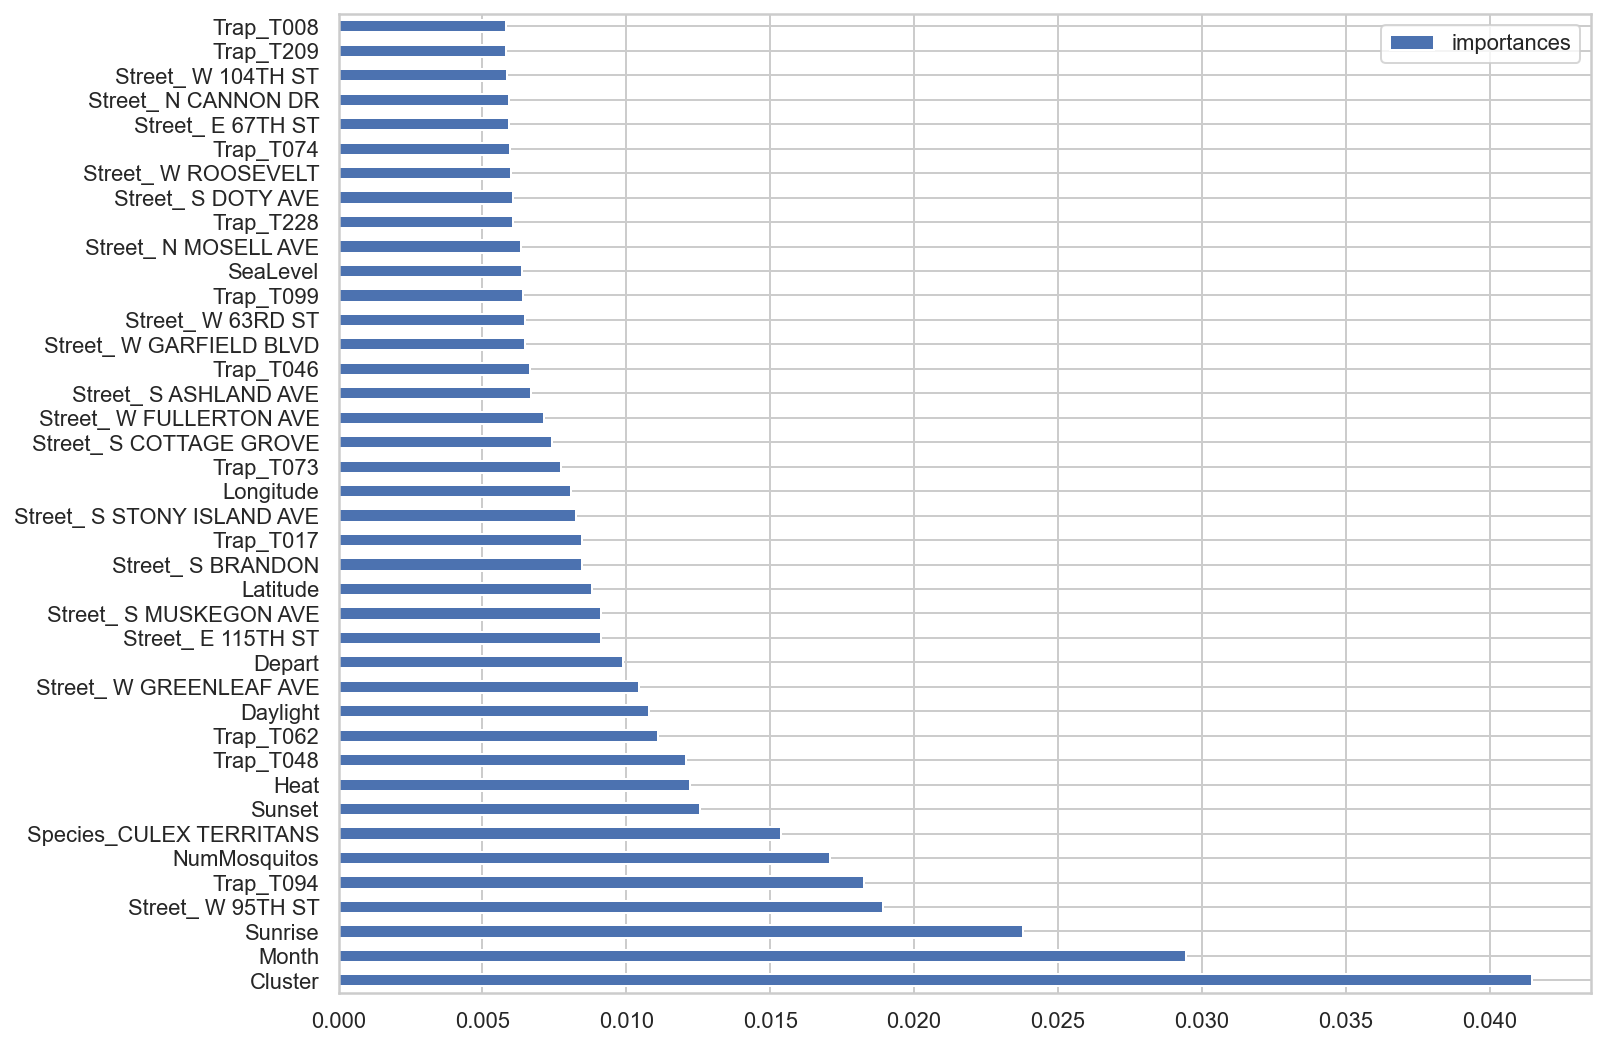

In [66]:
# visualise feature importances from the model
fi = pd.DataFrame({
    'features': X.columns,
    'importances': model.feature_importances_})
fig = fi.sort_values(by='importances', ascending=False).iloc[:40]
fig.plot(kind='barh', figsize=(10,9))
plt.yticks(range(len(fig)),fig['features'])
plt.show()

In [67]:
len(X.columns)

318

In [68]:
# csv for kaggle submission
features = list(X.columns)
test1 = test[features]

In [69]:
# csv for kaggle submission
pred = pd.DataFrame(model.predict_proba(test1), columns=['0','1']) 
submission = pd.DataFrame()
submission['WnvPresent'] = pred['1']
submission['Id'] = submission.index + 1
submission[['Id', 'WnvPresent']].to_csv('./datasets/submission_with_xgc2.csv', index = False)


Standard deviation of cross validation scores is low, indicating that the model should be able to generalise to unseen data.

---

### Model Evaluation (Cost Benifit)

- Confusion Matrix will be used to evaluate the mode's predictive quality

In [70]:
prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)  #tn, fp, fn, tp

pd.DataFrame(data=cm, columns=['predicted no wnv', 'predicted wmv'], index=['actual no wnv', 'actual wbv'])

,predicted no wnv,predicted wmv
actual no wnv,1922,724
actual wbv,0,2646


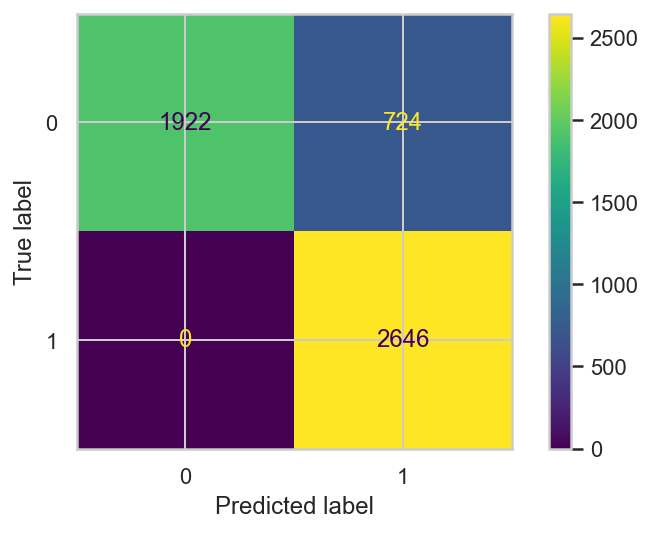

In [71]:
plot_confusion_matrix(model, X_test, y_test);

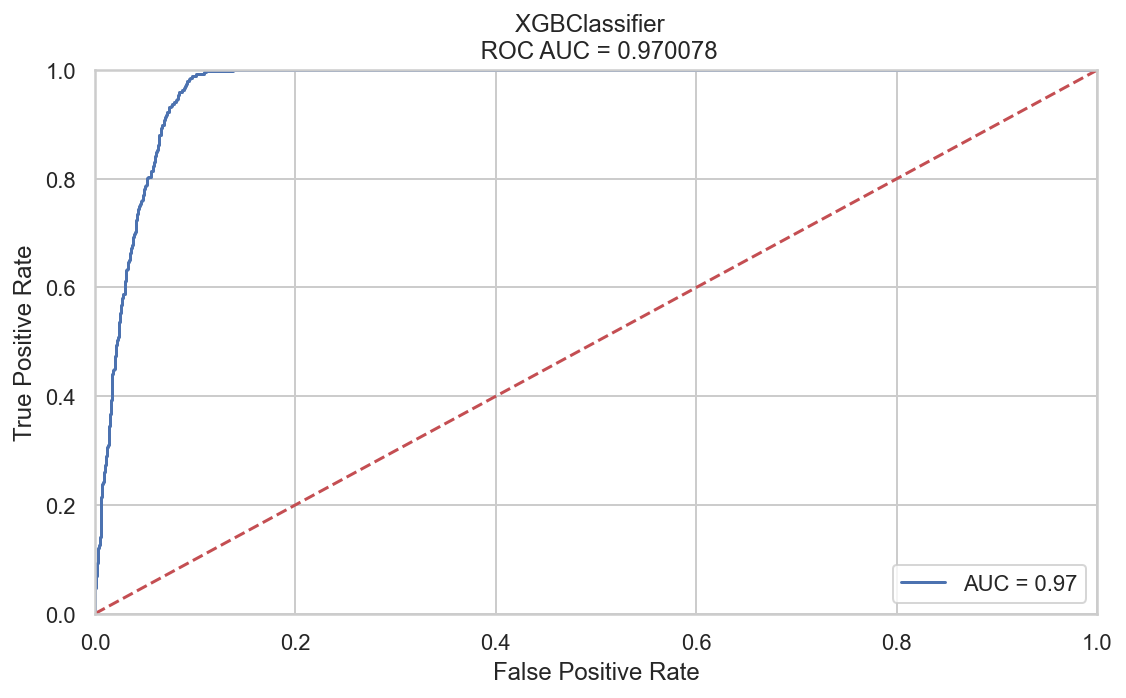

In [72]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#plot
plt.figure(figsize=(8,5))
plt.title(f'{type(model).__name__}  \n ROC AUC = {roc_auc:2f}')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

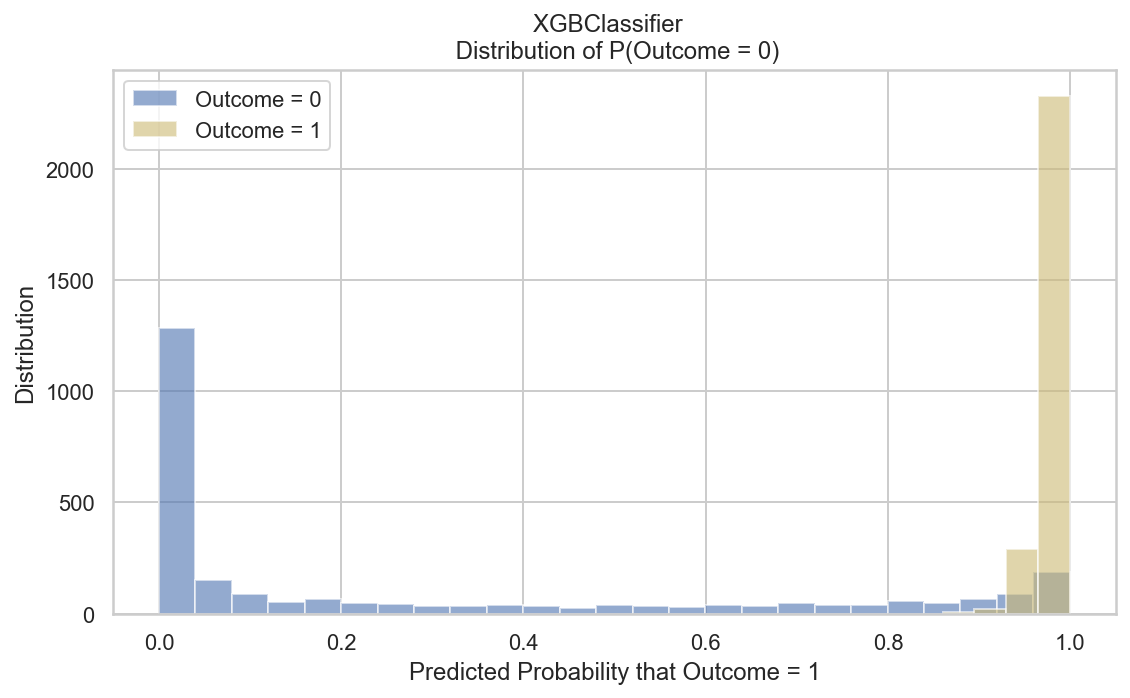

In [73]:
from sklearn.datasets import make_classification
prediction = model.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,5))
plt.title(f'{type(model).__name__}  \n Distribution of P(Outcome = 0)')
plt.hist(prediction[y_test==0], bins=25,color = 'b',alpha=0.6, label = 'Outcome = 0')
plt.hist(prediction[y_test==1], bins=4,color = 'y',alpha=0.6, label = 'Outcome = 1')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.ylabel('Distribution')
plt.legend()
plt.show() 

---

# Cost Analysis

## Cost
The Chicago Department of Public Health (CDPH) conducts mosquito spraying as part of their measure to reduce the occurrence of WNV. The spraying is conducted from dusk to around midnight from ultra low volumn (ULV) sprayer trucks, using the chemical Zenivex™ E4 ([City of Chicago, 2019](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2019/august/city-to-spray-insecticide-thursday-to-kill-mosquitoes.html)). This is a 4% solution of etofenprox, a reduced risk synthetic pyrethroid with an extremely low toxicity to mammals, 
 sprayed at 4.5 - 9 ounces per minute, at a vehicle speed of 10 - 15 mph. ([Central Massachussettes Mosquito Control Project](https://www.cmmcp.org/pesticide-information/pages/zenivex-e4-etofenprox)). Assuming each truck has an area of effect of about 3 m to each side of the truck, the overall spray area is approximately **0.6 km<sup>2</sup>** per truck.

The cost of Zenivex E4 is about \$80 USD per gallon ([North Dakota Department of Health, 2013](http://www.gfmosquito.com/wp-content/uploads/2013/06/2013-North-Dakota-Bid-Tabulation.pdf)). Given the current rate of spraying and assuming a total spray duration of 5 hours, the cost of pesticides for <i>each sprayer truck</i> is <b>\\$843.75 - \$1687.50 USD</b>. 

Given that the total area of Chicago is 606.1 km<sup>2</sup>, it would take about 1010 trucks at the same time to cover the entire area. 

## Benefit
Benefits from mosquito spraying would include increased quality of life from fewer people falling sick and dying, increased workplace productivity from fewer people falling ill and going on medical leave, as well as savings in hospital expenses from treating WNV patients. Of these, only the latter two are measurable.

About 1 in 5 people infected with WNV develop West Nile fever with other symptoms such as headache, body aches, joint pains, vomiting, etc. Recovery from West Nile fever takes from a few days to several weeks, and prolonged fatigue is common ([Peterson, 2019](https://www.uptodate.com/contents/west-nile-virus-infection-beyond-the-basics)). 

About 1 in 150 people infected develop severe neuroinvasive diseases such as encephalitis or meningitis, in which the virus travels through the blood and infects the brain and spinal cord. Recovery is prolonged and less than 40% of patients with the severe diseases recover after one year ([Peterson, 2019](https://www.uptodate.com/contents/west-nile-virus-infection-beyond-the-basics)).

Given that the median household income in Chicago was \\$55,295 (as of 2017; [Data USA](https://datausa.io/profile/geo/chicago-il/)), one can estimate the amount of losses the city will face from an incapacitated workforce. In 2017, there were 90 WNV cases, including 8 deaths ([CBS Chicago, 2019](https://chicago.cbslocal.com/2018/08/29/west-nile-virus-death-reported-in-illinois/)). This means that approximately 18 people developed West Nile fever. Assuming all were working adults and each took two weeks off work to recover, this would have resulted in a total income loss of \\$19,353. On average, each WNV patient spends approximately \\$25,000 in the hospital. Therefore the total monetary loss caused by WNV in 2017 is approximately \\$488,176.

## Effectiveness of spraying efforts thus far
Based on the exploratory data analysis conducted earlier, there was a lack of evidence to support the claim that mosquito spraying had any effect on reducing the number of mosquitos. It was also revealed during earlier EDA that spraying was only done in 2011 and 2013, and mostly in September. As this is near the end of summer, breeding conditions were already becoming less favourable for mosquitos, therefore it would be difficult to discern the effects of spraying from the natural decline in mosquito populations. Further examinations of spraying efforts in 2013 August also did not reveal any noticable decrease in WNV occurrences. 

## Conclusions
The main factors driving the spread of the West Nile virus (WNV) are the species of the mosquitos, the number of mosquitos, weather conditions, and the amount of daylight with in a certain period of time. Through our findings, we can conclude that the West Nile Virus is highly seasonal, becoming most prominent in July and August. This is due to the increase in the heat and mosquitos count. 

Because our goal is to prevent the spread of the virus, it is recommended to spay in places that have any indications of the virus. As from our model, some places can have the possibility of the virus being presence when there isn’t at the time. From a cost standpoint, spraying in these places will be beneficial in the long run due to how the virus can impact a patient.
